In [1]:
import sys
import os

# append to path root dir
sys.path.append('../')

In [2]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import dataset
import importlib

In [301]:
import dataset
importlib.reload(dataset)

<module 'dataset' from 'g:\\Dev\\AI\\Projects\\ImageGeneration\\dataset.py'>

In [302]:
dataset = dataset.AllAutoregressionGrayscale24px()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

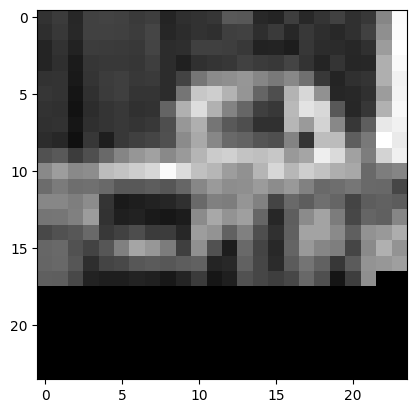

In [5]:
bruv = dataset.getspecific(0, 430)[0].view(1, 24, 24)
bruv = bruv.permute(1, 2, 0)
plt.imshow(bruv.numpy(), cmap='gray')

In [311]:
class Generator(nn.Module):
    def __init__(self, hidden_neurons):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1*24*24, hidden_neurons, bias=True),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.BatchNorm1d(hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.BatchNorm1d(hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.BatchNorm1d(hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, hidden_neurons, bias=True),
            nn.BatchNorm1d(hidden_neurons),
            nn.LeakyReLU(),
            nn.Linear(hidden_neurons, 256, bias=True),
            
            
        )

    def forward(self, x):
        return self.model(x)

In [312]:
DEVICE = 'cuda'

In [316]:
nnet = Generator(768).to(DEVICE)
# cross entropy loss
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(nnet.parameters(), 0.004)

In [307]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0001)

In [315]:
losses = []
total_losses = []

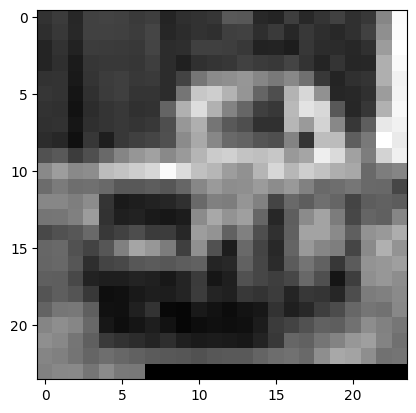

In [36]:
# plot batch
b = batch[0].view(1, 24, 24)
b = b.permute(1, 2, 0)
plt.imshow(b.numpy(), cmap='gray')

In [182]:
batch[0].requires_grad = True

In [148]:
batch[0][0:] = 0.0

In [183]:
output = nnet(batch[0].to(DEVICE))
loss = criterion(output, batch[1].to(DEVICE).squeeze())

In [184]:
# get gradient of loss with respect to input
grad = torch.autograd.grad(loss, batch[0], retain_graph=True)

(tensor(-0.7336), tensor(0.6561))

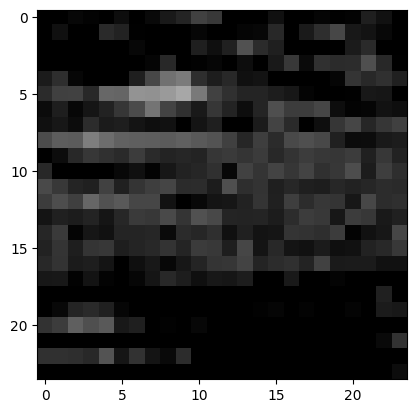

In [185]:
# visualize gradients


plt.imshow(grad[0].view(1, 24, 24).permute(1, 2, 0).cpu().numpy(), cmap='gray', vmin=0.0, vmax=1.0)

# color values
grad[0].min(), grad[0].max()


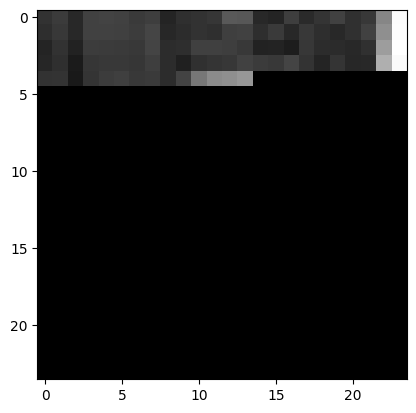

In [186]:
# visualize batch
plt.imshow(batch[0].view(24, 24).cpu().detach().numpy(), cmap='gray')

In [233]:
nnet.model[18].weight

Parameter containing:
tensor([[-0.1378, -0.1631, -0.1683,  ..., -0.1844, -0.2339, -0.1256],
        [-0.1533, -0.1123, -0.1025,  ..., -0.1367, -0.1252, -0.0897],
        [-0.0496, -0.1077, -0.1464,  ..., -0.1641, -0.1626, -0.1669],
        ...,
        [-0.0538, -0.0456, -0.1111,  ..., -0.1702, -0.1526, -0.1068],
        [-0.1186, -0.0678, -0.1432,  ..., -0.1685, -0.1811, -0.1210],
        [-0.0768, -0.0907, -0.2217,  ..., -0.1714, -0.1337, -0.0567]],
       device='cuda:0', requires_grad=True)

In [317]:
for epoch in range(100000):
    for i, batch in enumerate(dataloader):
        #for repeat in range(10000):
            #or mask in range(0, 24*24):
            #batch = dataset.getspecific(i, mask)
        output = nnet(batch[0].to(DEVICE))
        target = batch[1].to(DEVICE)

        
        loss = criterion(output.squeeze(), target.squeeze())
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

        losses.append(loss.item())
        if len(losses) > 100:
            losses.pop(0)
        
        avg_loss = sum(losses) / len(losses)

        print(epoch, i, repeat, mask, loss.item(), avg_loss, end="\r")
    
    total_losses.append(avg_loss)

KeyboardInterrupt: 

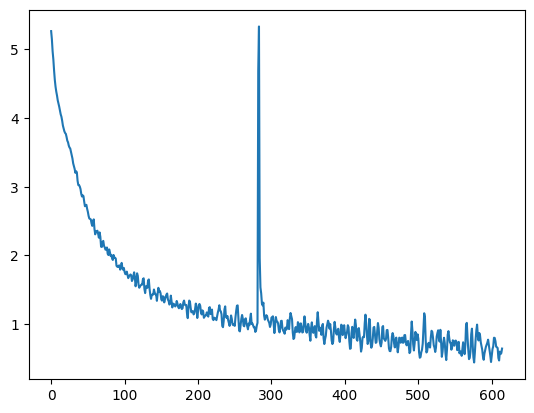

In [293]:
# one image - no batch norm - 512 hidden neurons - no biases
one_image_no_batch_norm_512_hidden_neurons_all_biases = total_losses
# plot loss curve
plt.plot(one_image_no_batch_norm_512_hidden_neurons_all_biases)


In [257]:
nnet = nnet.to("cpu")

In [259]:
# generate an image
image = torch.zeros((1, 24*24))


index = 0
initial_index = index

In [236]:
import time

In [237]:
24 * 24

576

In [265]:
nnet = nnet.eval()

torch.Size([1, 576])
tensor([[0.1922, 0.2275, 0.1529, 0.2510, 0.2588, 0.2510, 0.2235, 0.2392, 0.1412,
         0.1804, 0.1922, 0.2078, 0.3412, 0.3333, 0.1569, 0.1412, 0.2392, 0.1608,
         0.2039, 0.2549, 0.1843, 0.2157, 0.5137, 0.9608, 0.1765, 0.2196, 0.1569,
         0.2549, 0.2549, 0.2471, 0.2314, 0.2667, 0.1725, 0.1725, 0.1922, 0.1804,
         0.2431, 0.2549, 0.1765, 0.2235, 0.1529, 0.1529, 0.1765, 0.1569, 0.1882,
         0.2510, 0.5490, 0.9647, 0.1412, 0.1922, 0.2314, 0.2314, 0.2275, 0.2235,
         0.2196, 0.2627, 0.1686, 0.1765, 0.2471, 0.2471, 0.2392, 0.2157, 0.1333,
         0.1373, 0.1137, 0.2118, 0.1725, 0.1647, 0.1529, 0.1843, 0.6000, 0.9765,
         0.1451, 0.1804, 0.1059, 0.2078, 0.2157, 0.2196, 0.2078, 0.2392, 0.1725,
         0.1294, 0.1882, 0.2039, 0.2118, 0.2549, 0.2275, 0.2157, 0.2627, 0.1961,
         0.1412, 0.2039, 0.1490, 0.1529, 0.6706, 0.9569, 0.1922, 0.1961, 0.0980,
         0.2000, 0.2353, 0.2431, 0.2157, 0.2235, 0.1725, 0.2588, 0.4549, 0.5333,
       

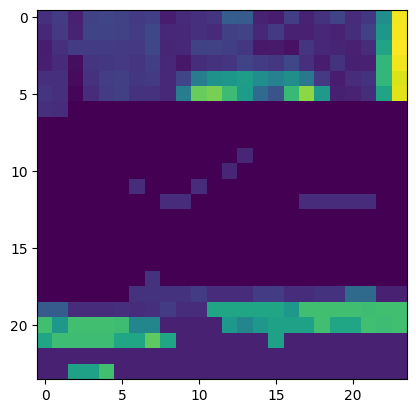

In [267]:
print(image.shape)

for i in range(24*24 - initial_index):
    #image[0][index] = -1.0

    with torch.no_grad():
        output = nnet(torch.flatten(image).unsqueeze(0))

    norm_pixel_value = torch.argmax(output).item() / 255.0

    image[0][index] = norm_pixel_value

    index += 1
    #print(image.shape)

    print(i, end="\r")

print(image)

flattened = torch.flatten(image)
bruv = flattened.view(1, 24, 24)
bruv = bruv.permute(1, 2, 0)

print(image.min(), image.max())


plt.imshow(bruv.detach().numpy())


In [21]:
train_sample = dataset[0]

In [22]:
pixel = nnet(train_sample[0])

In [23]:
pixel, train_sample[1]

(tensor([0.5691, 0.5586, 0.5434], grad_fn=<SigmoidBackward0>),
 tensor([0.4039, 0.4471, 0.4706]))